In [43]:
#Make sure to install xlrd 1.2:   pip install xlrd==1.2.0
import xlrd
import pandas as pd
import numpy as np
from random import randrange
import random
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline


In [4]:
file = ('/Users/alfaro/Documents/pythoncode/master/metodoscuantitativos/6290_Project1_Data.xlsx')

In [5]:
df = pd.read_excel(file)
#df = pd.read_excel(file, converters= {'Date': pd.to_datetime(arg, format='%Y%m%d', errors='ignore')})

In [6]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d', errors='ignore')

In [49]:
#Refresh Simulation
stocks_x_stdDev = []

,Date,GASL,KOOL,XOM,NFEC,DUST,NUGT,ASMB,FRAN,UVXY,...,CBIO,YTEN,SNOA,EDN,SES,LIVE,RNN,CAPR,ESV,ALIM
0,2016-01-29,-0.363192,0.400879,-0.001283,-0.041096,-0.177542,0.057249,-0.318242,0.047099,0.356919,...,-0.293930,-0.440195,0.086957,0.069024,-0.332638,0.041096,-0.008815,-0.131312,-0.364522,-0.045455
1,2016-02-29,-0.570333,-0.130145,0.038921,0.050000,-0.690881,1.261005,-0.113281,-0.008228,0.032992,...,-0.090498,0.763137,-0.207920,-0.099253,0.445313,0.019737,-0.032796,-0.080300,-0.113497,-0.069264
2,2016-03-31,0.554762,-0.126183,0.042919,0.008163,-0.230952,0.008615,0.105727,0.059735,-0.513579,...,-0.164179,0.250000,-0.036158,-0.010663,0.210811,-0.103226,-0.051437,0.034370,0.197232,-0.186047
3,2016-04-29,0.576187,-0.265085,0.057543,-0.055331,-0.591331,1.033994,0.195219,-0.133612,-0.119503,...,-0.160714,-0.200000,0.037410,-0.056287,0.071429,0.201439,-0.091184,0.551181,0.153327,0.268571
4,2016-05-31,0.015060,-0.003509,0.015498,-0.018571,0.287879,-0.386327,-0.048333,-0.372289,-0.362515,...,0.092199,-0.473684,-0.020202,-0.046320,-0.091667,0.047904,0.066667,-0.190355,-0.173077,-0.306306
5,2016-06-30,-0.034697,0.031690,0.053022,0.090102,-0.539412,0.726016,-0.028021,0.060461,-0.130876,...,-0.012987,0.037500,-0.173196,0.165003,-0.036697,-0.142857,-0.215000,0.238245,-0.017189,-0.201299
6,2016-07-29,-0.009172,0.426621,-0.051099,0.749232,-0.334610,0.272677,0.007207,0.150226,-0.462354,...,-0.019737,-0.283373,0.069327,0.015991,0.000000,0.133333,0.044984,-0.063291,-0.055613,0.666667
7,2016-08-31,0.123843,0.016746,-0.011917,-0.190840,0.620345,-0.445829,0.093023,0.073957,-0.216963,...,-0.194631,-0.280430,-0.046175,-0.016301,0.314286,0.082353,-0.043810,-0.010811,-0.171210,-0.253659
8,2016-09-30,0.073909,-0.077647,0.001607,0.084906,-0.202322,0.064081,0.180033,0.130403,-0.161209,...,0.008333,0.051402,0.061125,0.131429,-0.123188,0.038043,-0.163347,-0.114044,0.119895,-0.026144
9,2016-10-31,-0.259950,-0.232143,-0.045371,-0.121739,0.134541,-0.257264,0.958391,0.041478,-0.003604,...,-0.404959,0.111111,-0.078341,0.296465,-0.181818,-0.036649,-0.206190,-0.102572,-0.080000,-0.161074


In [ ]:
df

In [68]:
# Enter the desired number of portfolios.  
number_of_portfolios = 6
# Enter the desired number of stocks. 
number_of_stocks =50

In [69]:
print('Number of Portfolios: {}'.format(str(number_of_portfolios)))
print('Number of Stocks: {} \n'.format(str(number_of_stocks)))
column_names = df.columns.values.tolist()

for i in range(1,number_of_portfolios+1):
    _p0_list = []
    for ticker in range(1,number_of_stocks+1):_p0_list.append(100)
    _p0 = [np.array(_p0_list, dtype=object)]
    random_stocks = []
    random_stock_tickers = []
    random_stocks.extend(random.sample(range(1, 100), number_of_stocks))
    print ('Portfolio {} tickers:'.format(str(i)))
    print(random_stocks)
    for stock in random_stocks:
        if stock != 0:
            random_stock_tickers.append(column_names[stock])
    print(random_stock_tickers)
    p = df.iloc[:,random_stocks]
    _p1 = np.concatenate((_p0,p.to_numpy()+1), axis=0)
    _p2 = np.cumprod(_p1, axis=0)
    portfolio_value_by_month = np.sum(_p2, axis=1)
    portfolio_monthly_change = np.diff(portfolio_value_by_month) / portfolio_value_by_month[:-1] * 100.
    portfolio_mean = np.mean(portfolio_monthly_change)
    portfolio_stddev = np.std(portfolio_monthly_change)
    stocks_x_stdDev.append([number_of_stocks, portfolio_stddev])
    #PRINTS ONLY LAST ITERATION IN JUNYPER.  RUN IN TERMINAL FOR ALL ITERATIONS
    print('Portfolio Average Return: {}'.format(str(portfolio_mean)))
    print('Portfolio Standard Deviation: {} \n'.format(str(portfolio_stddev)))

#print('Number of Stocks, Standard Deviation')
#print(stocks_x_stdDev)
    
    
    


Number of Portfolios: 6
Number of Stocks: 50 

Portfolio 1 tickers:
[41, 23, 38, 51, 80, 26, 34, 13, 63, 46, 60, 17, 88, 76, 21, 83, 92, 96, 27, 33, 9, 87, 56, 54, 25, 91, 99, 15, 47, 86, 55, 7, 28, 37, 89, 53, 45, 42, 12, 67, 49, 59, 6, 8, 1, 95, 35, 50, 77, 24]
['SAGE', 'MNK', 'MIK', 'EYEG', 'IGLD', 'JDST', 'BPTH', 'PBYI', 'AXE', 'MRO', 'DXR', 'HIIQ', 'GTXI', 'TEN', 'PTLA', 'INSG', 'YTEN', 'LIVE', 'JNUG', 'AGTC', 'UVXY', 'DVAX', 'SBOT', 'ZYNE', 'AAMC', 'CBIO', 'ESV', 'PCG', 'HSGX', 'CONN', 'AXSM', 'ASMB', 'ALQA', 'ARDX', 'JRJC', 'BNTC', 'EYES', 'AUPH', 'CCXI', 'X', 'GUSH', 'EQT', 'NUGT', 'FRAN', 'GASL', 'SES', 'ARAV', 'EVH', 'ABIO', 'XON']
Portfolio Average Return: -0.7124967969388669
Portfolio Standard Deviation: 7.929334251379177 

Portfolio 2 tickers:
[30, 67, 56, 62, 61, 33, 6, 77, 72, 69, 1, 34, 60, 85, 89, 25, 45, 20, 8, 42, 19, 78, 26, 97, 75, 48, 90, 96, 4, 23, 51, 29, 18, 50, 63, 52, 24, 43, 64, 83, 46, 99, 3, 32, 81, 58, 13, 82, 73, 92]
['FLXN', 'X', 'SBOT', 'ASNA', 'PYX', 

In [70]:
final_df = pd.DataFrame (stocks_x_stdDev,columns=['Number of Stocks','Standard Deviation'])
final_df

,Number of Stocks,Standard Deviation
0,5,9.171654
1,5,11.903703
2,5,9.981786
3,5,10.348644
4,5,15.275561
5,5,6.994173
6,10,12.750789
7,10,8.867165
8,10,12.474497
9,10,10.142703


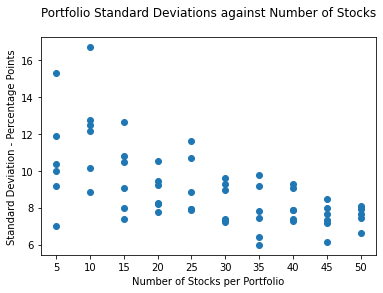

In [73]:
#X_plot = np.linspace(0,1,100)
plt.scatter(final_df.iloc[:,0], final_df.iloc[:,1])
plt.title('Portfolio Standard Deviations against Number of Stocks\n')
plt.ylabel('Standard Deviation - Percentage Points')
plt.xlabel('Number of Stocks per Portfolio')
ax = plt.gca()
ax.xaxis.set_major_locator(tck.MultipleLocator(5))
#ax.xaxis.set_minor_locator(tck.MultipleLocator(5))
#plt.figure(figsize=(1800/192, 1800/192), dpi=192)
plt.show()
#plt.savefig('project1_graph.png')

### 